In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('TSLA.csv')

In [3]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
248,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
249,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
250,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800
251,2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000


In [6]:
# set index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df


,Date,Open,High,Low,Close,Adj Close,Volume
2020-01-02,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
2020-12-28,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
2020-12-29,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800
2020-12-30,2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000


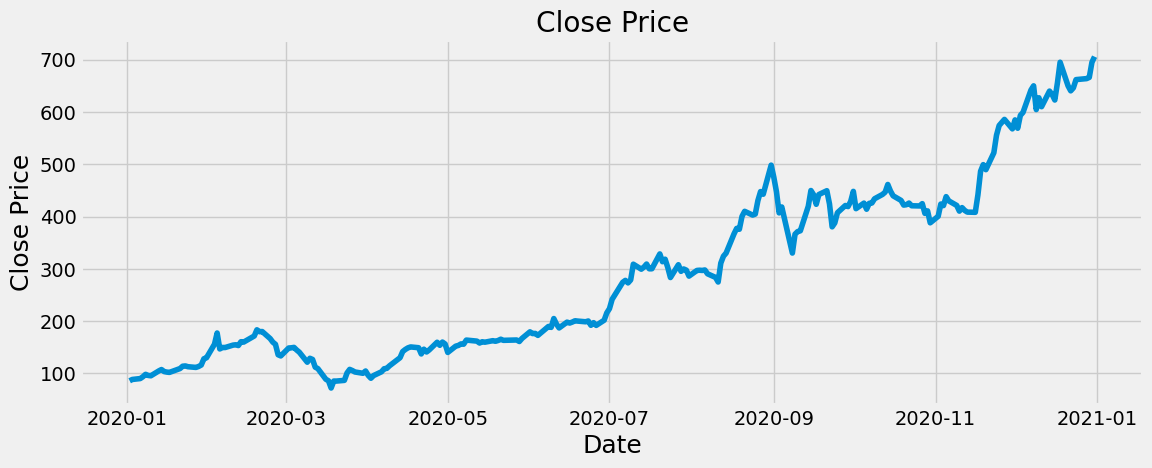

In [9]:
# visually show close price
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price', fontsize =18)
plt.show()

In [14]:
# calculate the short or fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust =False).mean()

# calculate the missle and medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean()

# calculate long and slow exponential moving average
LongEMA = df.Close.ewm(span=63, adjust=False).mean()

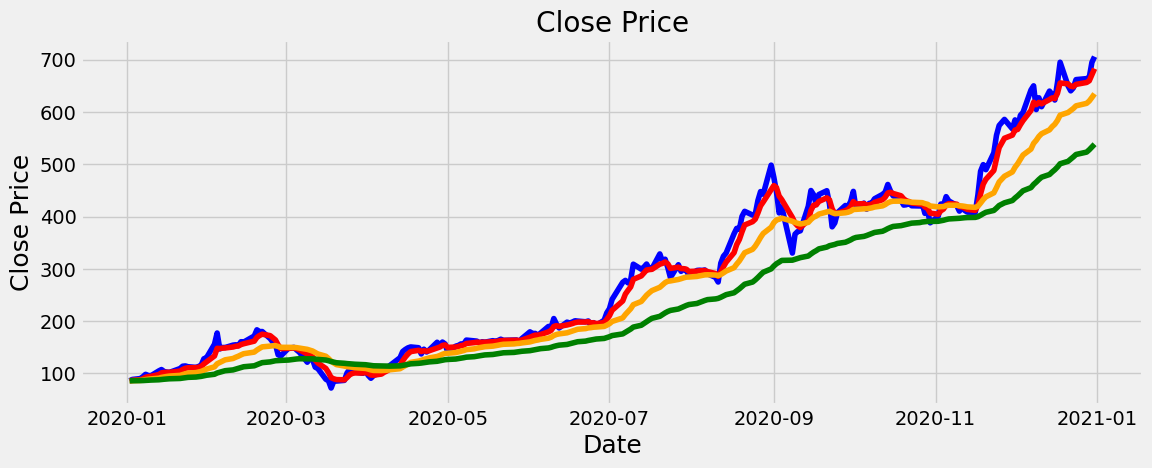

In [16]:
# visualise the closing price and moving averages
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price')
plt.plot(df['Close'], label = 'Close Price', color = 'blue')
plt.plot(ShortEMA, label = 'Short/Fast EMA', color = 'red')
plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color = 'orange')
plt.plot(LongEMA, label = 'long/low EMA', color = 'green')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price', fontsize =18)
plt.show()

In [17]:
# Adding exponential moving averages to the data

df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['long'] = LongEMA

In [18]:
# visualize data
print(df)

                  Date        Open        High         Low       Close  \
2020-01-02  2020-01-02   84.900002   86.139999   84.342003   86.052002   
2020-01-03  2020-01-03   88.099998   90.800003   87.384003   88.601997   
2020-01-06  2020-01-06   88.094002   90.311996   88.000000   90.307999   
2020-01-07  2020-01-07   92.279999   94.325996   90.671997   93.811996   
2020-01-08  2020-01-08   94.739998   99.697998   93.646004   98.428001   
...                ...         ...         ...         ...         ...   
2020-12-24  2020-12-24  642.989990  666.090027  641.000000  661.770020   
2020-12-28  2020-12-28  674.510010  681.400024  660.799988  663.690002   
2020-12-29  2020-12-29  661.000000  669.900024  655.000000  665.989990   
2020-12-30  2020-12-30  672.000000  696.599976  668.359985  694.780029   
2020-12-31  2020-12-31  699.989990  718.719971  691.119995  705.669983   

             Adj Close     Volume       Short      Middle        long  
2020-01-02   86.052002   47660500   86.

In [19]:
import numpy as np

# Create the function to buy and sell stock
def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False

    for i in range(0, len(data)):
        if data['Middle'][i] < data['long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif data['Middle'][i] > data['long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)

    return (buy_list, sell_list)


In [20]:
# add the buy and sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

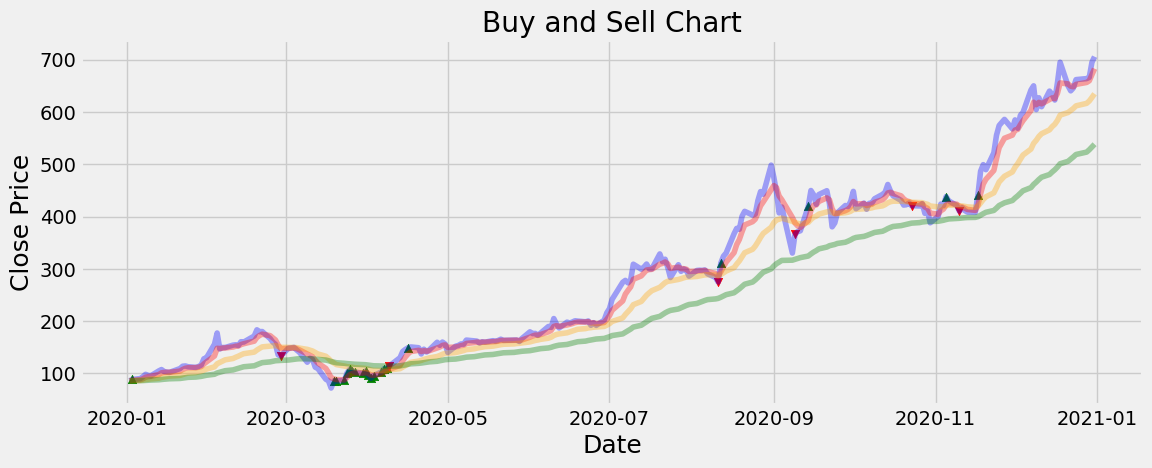

In [21]:
# visually show the stock buy and sell signals
# visualise the closing price and moving averages
plt.figure(figsize=(12.2, 4.5))
plt.title('Buy and Sell Chart')
plt.plot(df['Close'], label = 'Close Price', color = 'blue', alpha = 0.35)
plt.plot(ShortEMA, label = 'Short/Fast EMA', color = 'red', alpha = 0.35)
plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color = 'orange', alpha = 0.35)
plt.plot(LongEMA, label = 'long/low EMA', color = 'green', alpha = 0.35)
plt.scatter(df.index, df['Buy'], color = 'green', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', marker = 'v', alpha = 1)

plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price', fontsize =18)
plt.show()